##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import numpy as np
dat=[]
count=0
eachdat=[]
with open('/content/drive/MyDrive/x_train.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
      row=[int(i) for i in row]
      eachval=np.array_split(row, 28)
      dat.append(eachval)


In [ ]:
ytrain=[]
with open('/content/drive/MyDrive/y_train.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
      row=[int(i) for i in row]
      eachval=np.array(row)
      ytrain.append(eachval)

In [ ]:
xtrain=dat

In [ ]:
xtest=[]
with open('/content/drive/MyDrive/x_test.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
      row=[int(i) for i in row]
      eachval=np.array_split(row, 28)
      xtest.append(eachval)

In [ ]:
ytest=[]
with open('/content/drive/MyDrive/y_test.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
      row=[int(i) for i in row]
      eachval=np.array(row)
      ytest.append(eachval)

In [ ]:
len(ytrain)

60001

In [ ]:
train_images=np.array(xtrain)
train_labels=np.array(ytrain)
test_images=np.array(xtest)
test_labels=np.array(ytest)

In [ ]:
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Create the convolutional base

In [ ]:
optimizer = tf.keras.optimizers.SGD()
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=1,padding="same",activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), strides=1,padding="same",activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(5,activation='relu'))
model.add(layers.Softmax())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 5)                 31365     
                                                                 
 softmax (Softmax)           (None, 5)                 0         
                                                        

In [ ]:
import time
print(time.time())

1681069284.8433974


In [ ]:
import time
start=time.time()
model.compile(optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))
end=time.time()
modeltime=end-start
print("Total time: ",modeltime)

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1876/1876 [==============================] - 18s 5ms/step - loss: 0.8754 - accuracy: 0.6406 - val_loss: 0.7626 - val_accuracy: 0.6785
Epoch 2/20
1876/1876 [==============================] - 8s 5ms/step - loss: 0.6916 - accuracy: 0.7044 - val_loss: 0.8849 - val_accuracy: 0.6002
Epoch 3/20
1876/1876 [==============================] - 9s 5ms/step - loss: 0.6447 - accuracy: 0.7195 - val_loss: 0.9458 - val_accuracy: 0.6163
Epoch 4/20
1876/1876 [==============================] - 8s 4ms/step - loss: 0.5878 - accuracy: 0.7453 - val_loss: 0.4006 - val_accuracy: 0.8467
Epoch 5/20
1876/1876 [==============================] - 9s 5ms/step - loss: 0.3326 - accuracy: 0.8806 - val_loss: 1.5671 - val_accuracy: 0.6690
Epoch 6/20
1876/1876 [==============================] - 8s 4ms/step - loss: 0.3061 - accuracy: 0.8913 - val_loss: 0.6146 - val_accuracy: 0.7991
Epoch 7/20
1876/1876 [==============================] - 8s 4ms/step - loss: 0.2863 - accuracy: 0.8985 - val_loss: 0.2948 - val_accuracy: 0.8945
Ep

### Evaluate the model

313/313 - 1s - loss: 0.3901 - accuracy: 0.8641 - 678ms/epoch - 2ms/step


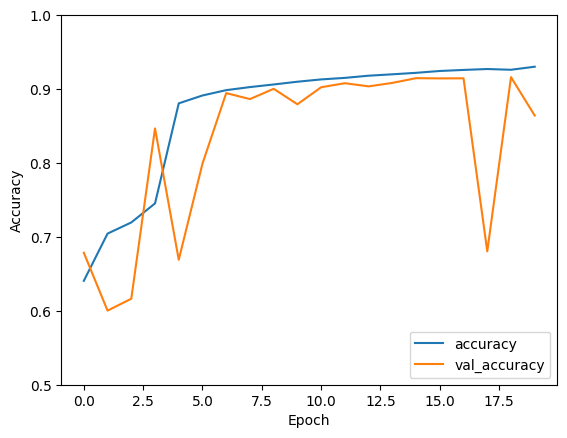

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.8641135692596436


In [ ]:
model.layers[4].output

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense')>

In [ ]:
from keras import Model

## Model 2 - Dropout

In [ ]:
#from keras.api._v2.keras import Sequential
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense, Dropout
model2 = models.Sequential()
model2.add(Conv2D(128, kernel_size = (3,3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D((2, 2),padding='same'))
model2.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', padding = 'same'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D((2, 2),padding='same'))
model2.add(Conv2D(64, kernel_size = (3,3), activation = 'linear', padding = 'same'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D((2, 2),padding='same'))
model2.add(Flatten())
model2.add(Dense(32, activation = 'linear'))
model2.add(Dropout(0.1, input_shape=(32,)))
model2.add(Dense(64, activation = 'linear'))
model2.add(Dense(5, activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 128)       1280      
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        36896     
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                 

In [ ]:
import time
optimizer2 = tf.keras.optimizers.SGD()
start2=time.time()
model2.compile(optimizer2,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))
end2=time.time()
mod2time=end2-start2
print("Time for model: ",mod2time)

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1876/1876 [==============================] - 13s 6ms/step - loss: 0.7202 - accuracy: 0.7024 - val_loss: 0.4567 - val_accuracy: 0.8308
Epoch 2/20
1876/1876 [==============================] - 11s 6ms/step - loss: 0.4081 - accuracy: 0.8490 - val_loss: 1.3701 - val_accuracy: 0.6482
Epoch 3/20
1876/1876 [==============================] - 11s 6ms/step - loss: 0.3391 - accuracy: 0.8772 - val_loss: 0.3841 - val_accuracy: 0.8556
Epoch 4/20
1876/1876 [==============================] - 11s 6ms/step - loss: 0.3009 - accuracy: 0.8918 - val_loss: 0.3075 - val_accuracy: 0.8893
Epoch 5/20
1876/1876 [==============================] - 11s 6ms/step - loss: 0.2772 - accuracy: 0.9000 - val_loss: 0.3404 - val_accuracy: 0.8785
Epoch 6/20
1876/1876 [==============================] - 11s 6ms/step - loss: 0.2595 - accuracy: 0.9070 - val_loss: 0.2729 - val_accuracy: 0.9047
Epoch 7/20
1876/1876 [==============================] - 11s 6ms/step - loss: 0.2447 - accuracy: 0.9129 - val_loss: 0.2573 - val_accuracy: 0.9

313/313 - 1s - loss: 0.2024 - accuracy: 0.9275 - 897ms/epoch - 3ms/step


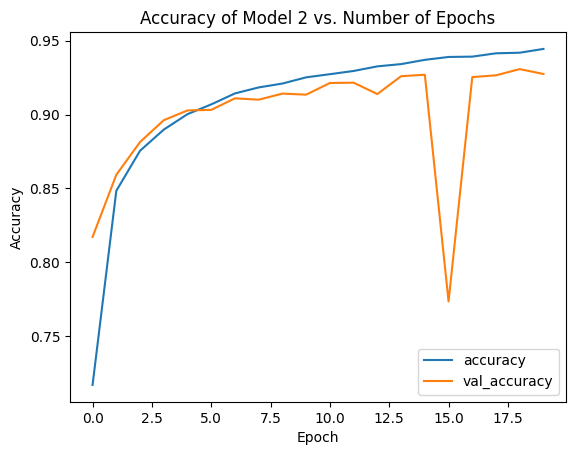

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
#plt.plot(history2.history['loss'], label = 'loss')
plt.title("Accuracy of Model 2 vs. Number of Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss2, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.2024 - accuracy: 0.9275 - 888ms/epoch - 3ms/step


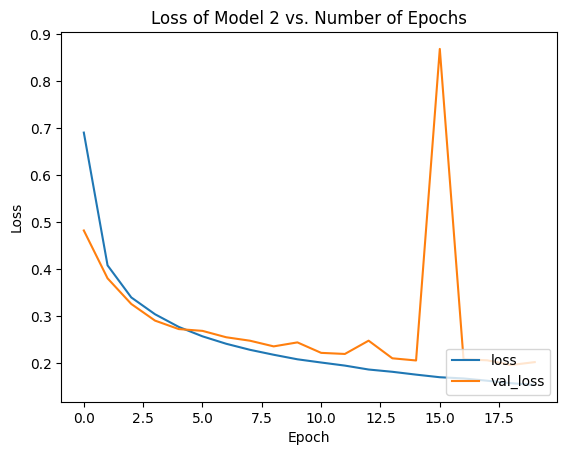

In [ ]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.title("Loss of Model 2 vs. Number of Epochs")

plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss2, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)

## Model 3 - Added Convolutional Layers

In [ ]:
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense, Dropout
model3 = models.Sequential()
model3.add(Conv2D(128, kernel_size = (3,3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D((2, 2),padding='same'))
model3.add(Conv2D(64, kernel_size = (3,3), activation = 'linear', padding = 'same'))
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D((2, 2),padding='same'))
model3.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', padding = 'same'))
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D((2, 2),padding='same'))
model3.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', padding = 'same'))
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D((2, 2),padding='same'))
model3.add(Flatten())

model3.add(Dense(128, activation = 'linear'))
model3.add(Dropout(0.3))
model3.add(Dense(64, activation = 'linear'))
model3.add(Dense(5, activation='softmax'))
#model3.add(layers.Softmax())

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [ ]:
optimizer3 = tf.keras.optimizers.SGD()
start3=time.time()
model3.compile(optimizer3,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))
end3=time.time()

Epoch 1/20
1876/1876 [==============================] - 14s 7ms/step - loss: 0.7058 - accuracy: 0.7079 - val_loss: 2.6157 - val_accuracy: 0.4392
Epoch 2/20
1876/1876 [==============================] - 13s 7ms/step - loss: 0.3837 - accuracy: 0.8581 - val_loss: 0.3982 - val_accuracy: 0.8457
Epoch 3/20
1876/1876 [==============================] - 13s 7ms/step - loss: 0.3109 - accuracy: 0.8870 - val_loss: 0.7803 - val_accuracy: 0.7806
Epoch 4/20
1876/1876 [==============================] - 13s 7ms/step - loss: 0.2773 - accuracy: 0.8997 - val_loss: 0.2695 - val_accuracy: 0.9053
Epoch 5/20
1876/1876 [==============================] - 13s 7ms/step - loss: 0.2521 - accuracy: 0.9097 - val_loss: 1.3624 - val_accuracy: 0.6621
Epoch 6/20
1876/1876 [==============================] - 12s 7ms/step - loss: 0.2381 - accuracy: 0.9146 - val_loss: 0.2426 - val_accuracy: 0.9160
Epoch 7/20
1876/1876 [==============================] - 12s 6ms/step - loss: 0.2225 - accuracy: 0.9198 - val_loss: 0.2321 - val_ac

313/313 - 1s - loss: 0.2149 - accuracy: 0.9235 - 903ms/epoch - 3ms/step


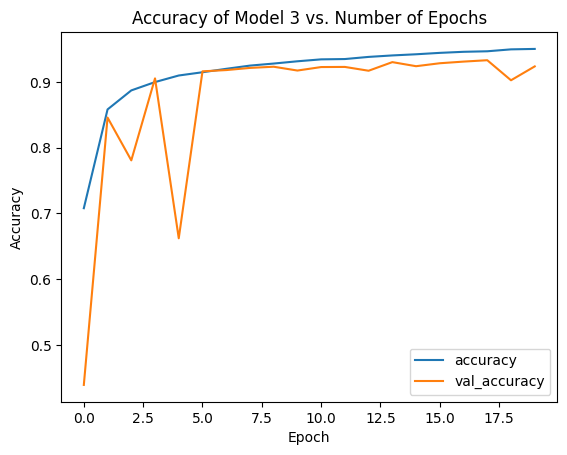

In [ ]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy of Model 3 vs. Number of Epochs')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss3, test_acc3 = model3.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.2149 - accuracy: 0.9235 - 885ms/epoch - 3ms/step


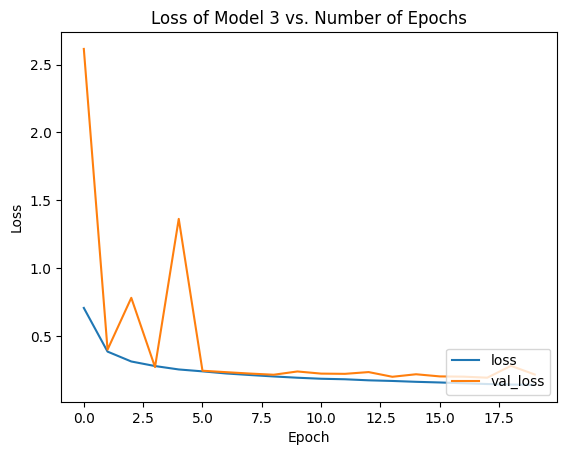

In [ ]:
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label = 'val_loss')
plt.title("Loss of Model 3 vs. Number of Epochs")

plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss3, test_acc3 = model3.evaluate(test_images,  test_labels, verbose=2)

## Model 4 - SELU

In [ ]:
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense, AlphaDropout
model4 = models.Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),
activation='selu',
input_shape = (28, 28, 1), padding = 'same',
kernel_initializer='lecun_normal'))
model4.add(Conv2D(64, (3, 3), activation='selu',
kernel_initializer='lecun_normal'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(AlphaDropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='selu',
kernel_initializer='lecun_normal'))
model4.add(Dense(5, activation='sigmoid'))

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 alpha_dropout (AlphaDropout  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [ ]:
import time
optimizer4 = tf.keras.optimizers.SGD()
start4=time.time()
model4.compile(optimizer4,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history4 = model4.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))
end4=time.time()

Epoch 1/20
1876/1876 [==============================] - 12s 6ms/step - loss: 0.4575 - accuracy: 0.8268 - val_loss: 0.3271 - val_accuracy: 0.8823
Epoch 2/20
1876/1876 [==============================] - 10s 5ms/step - loss: 0.3166 - accuracy: 0.8845 - val_loss: 0.3123 - val_accuracy: 0.8904
Epoch 3/20
1876/1876 [==============================] - 10s 5ms/step - loss: 0.2713 - accuracy: 0.9008 - val_loss: 0.3024 - val_accuracy: 0.8945
Epoch 4/20
1876/1876 [==============================] - 9s 5ms/step - loss: 0.2460 - accuracy: 0.9106 - val_loss: 0.2386 - val_accuracy: 0.9162
Epoch 5/20
1876/1876 [==============================] - 10s 5ms/step - loss: 0.2268 - accuracy: 0.9175 - val_loss: 0.2583 - val_accuracy: 0.9127
Epoch 6/20
1876/1876 [==============================] - 10s 6ms/step - loss: 0.2106 - accuracy: 0.9242 - val_loss: 0.2480 - val_accuracy: 0.9196
Epoch 7/20
1876/1876 [==============================] - 10s 5ms/step - loss: 0.1979 - accuracy: 0.9283 - val_loss: 0.2278 - val_acc

313/313 - 1s - loss: 0.2093 - accuracy: 0.9376 - 755ms/epoch - 2ms/step


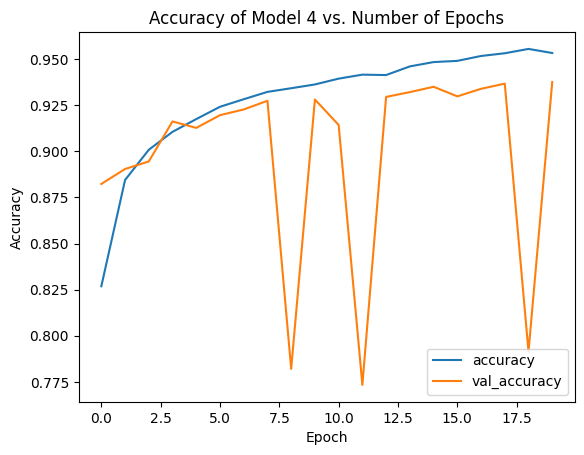

In [ ]:
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy of Model 4 vs. Number of Epochs')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss4, test_acc4 = model4.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.2093 - accuracy: 0.9376 - 777ms/epoch - 2ms/step


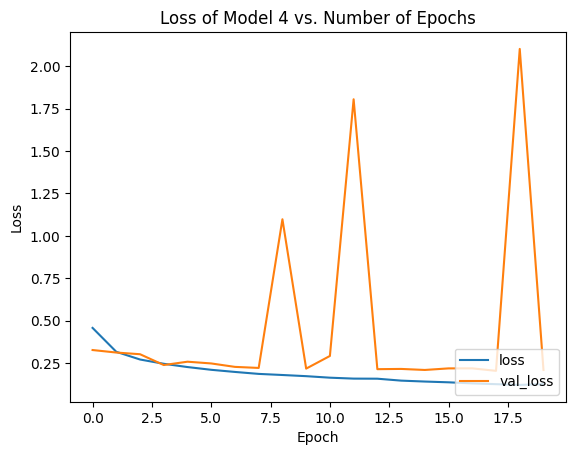

In [ ]:
plt.plot(history4.history['loss'], label='loss')
plt.plot(history4.history['val_loss'], label = 'val_loss')
plt.title("Loss of Model 4 vs. Number of Epochs")

plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss4, test_acc4 = model4.evaluate(test_images,  test_labels, verbose=2)

## Model 5 - Batch Normalization

In [ ]:
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense, Dropout,ConvLSTM2D,BatchNormalization
model5 = models.Sequential()
model5.add(Conv2D(128, kernel_size = (3,3), activation = 'linear', input_shape = (28, 28, 1), padding = 'same'))
model5.add(LeakyReLU(alpha=0.1))
model5.add(MaxPooling2D((2, 2),padding='same'))
model5.add(Conv2D(64, kernel_size = (3,3), activation = 'linear', padding = 'same'))
model5.add(LeakyReLU(alpha=0.1))
model5.add(MaxPooling2D((2, 2),padding='same'))
model5.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', padding = 'same'))
model5.add(LeakyReLU(alpha=0.1))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2),padding='same'))
model5.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', padding = 'same'))
model5.add(LeakyReLU(alpha=0.1))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2),padding='same'))
model5.add(Flatten())
#model5.add(Dropout(0.3))
model5.add(Dense(256, activation = 'linear'))
model5.add(Dense(64, activation = 'linear'))
model5.add(Dense(5, activation='softmax'))

In [ ]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       1280      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

In [ ]:
import time
optimizer5 = tf.keras.optimizers.SGD()
start5=time.time()
model5.compile(optimizer5,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history5 = model5.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))
end5=time.time()

Epoch 1/20
1876/1876 [==============================] - 15s 7ms/step - loss: 0.3855 - accuracy: 0.8558 - val_loss: 0.3807 - val_accuracy: 0.8620
Epoch 2/20
1876/1876 [==============================] - 13s 7ms/step - loss: 0.2497 - accuracy: 0.9087 - val_loss: 0.3090 - val_accuracy: 0.8819
Epoch 3/20
1876/1876 [==============================] - 13s 7ms/step - loss: 0.2154 - accuracy: 0.9208 - val_loss: 0.2379 - val_accuracy: 0.9119
Epoch 4/20
1876/1876 [==============================] - 13s 7ms/step - loss: 0.1951 - accuracy: 0.9292 - val_loss: 72.7621 - val_accuracy: 0.1000
Epoch 5/20
1876/1876 [==============================] - 13s 7ms/step - loss: 0.2536 - accuracy: 0.9101 - val_loss: 0.2497 - val_accuracy: 0.9118
Epoch 6/20
1876/1876 [==============================] - 13s 7ms/step - loss: 0.1850 - accuracy: 0.9333 - val_loss: 0.2293 - val_accuracy: 0.9173
Epoch 7/20
1876/1876 [==============================] - 13s 7ms/step - loss: 0.1695 - accuracy: 0.9393 - val_loss: 1.1287 - val_a

313/313 - 1s - loss: 0.2097 - accuracy: 0.9339 - 906ms/epoch - 3ms/step


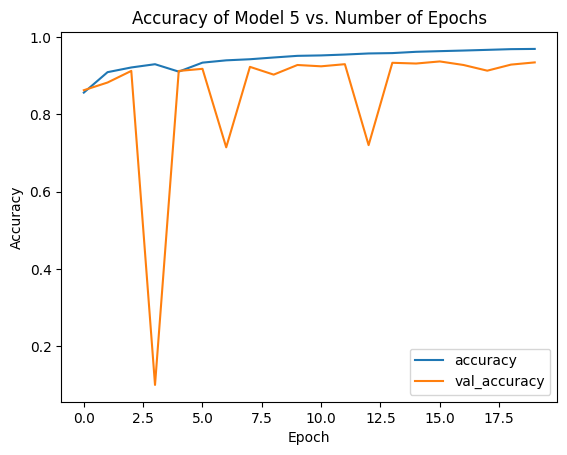

In [ ]:
plt.plot(history5.history['accuracy'], label='accuracy')
plt.plot(history5.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy of Model 5 vs. Number of Epochs')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss5, test_acc5 = model5.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.2097 - accuracy: 0.9339 - 899ms/epoch - 3ms/step


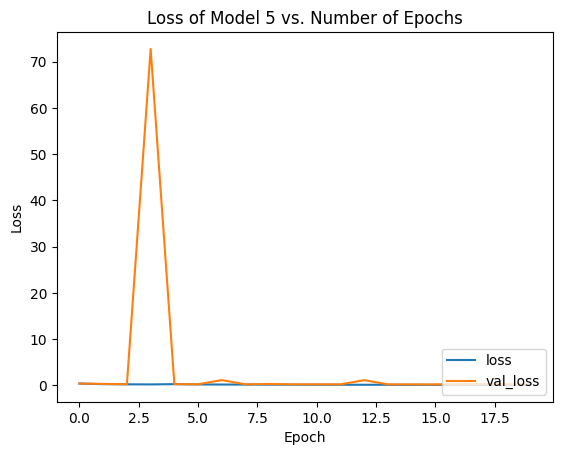

In [ ]:
plt.plot(history5.history['loss'], label='loss')
plt.plot(history5.history['val_loss'], label = 'val_loss')
plt.title("Loss of Model 5 vs. Number of Epochs")

plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss5, test_acc5 = model5.evaluate(test_images,  test_labels, verbose=2)

## Question 4

In [ ]:
layer_name4 = 'dense_1'
#layer_name4='dense_14'
intermediate_layer_model4 = tf.keras.Model(inputs=model2.input,
                                 outputs=model2.get_layer(layer_name4).output)
intermediate_output4 = intermediate_layer_model4.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
intermediate_output4.shape

(10001, 32)

## PCA

In [ ]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pca4 = PCA(n_components=2)

principalComponents4= pca4.fit_transform(intermediate_output4)

principalDf4 = pd.DataFrame(data = principalComponents4, columns = ['principal component 1', 'principal component 2'])

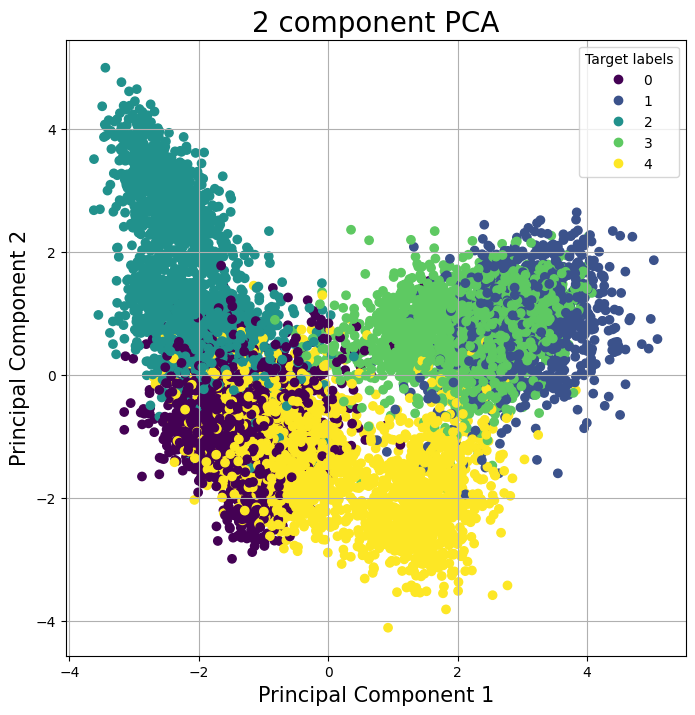

In [ ]:
finalDf4 = pd.concat([principalDf4, pd.DataFrame(test_labels,columns = ['target'])], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = test_labels
scatter=ax.scatter(finalDf4['principal component 1']
               , finalDf4['principal component 2']
               , c = finalDf4['target']
               )
ax.legend(*scatter.legend_elements(),title="Target labels")

ax.grid()

## DBSCAN

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import DBSCAN
import numpy as np


clustering4 = DBSCAN(eps=0.5, min_samples=7).fit(intermediate_output4)
clustering4.labels_

clustering4

DBSCAN(min_samples=7)

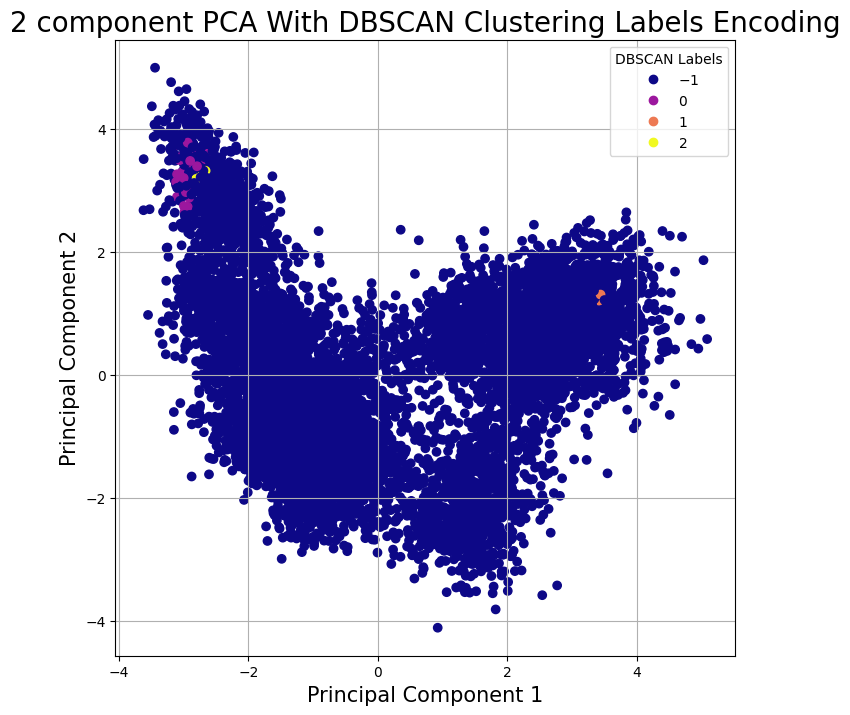

In [ ]:
#plt.scatter(principalDf4['principal component 1'],principalDf4['principal component 2'], c = clustering4.labels_, cmap= "plasma") # plotting the clusters
#plt.legend()
#plt.xlabel("Principal Component 1") # X-axis label
#plt.ylabel("Principal Component 2") # Y-axis label
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA With DBSCAN Clustering Labels Encoding', fontsize = 20)
scatter=ax.scatter(finalDf4['principal component 1']
               , finalDf4['principal component 2'],
               c = clustering4.labels_, cmap= "plasma"
               )
ax.legend(*scatter.legend_elements(),title="DBSCAN Labels")

ax.grid()
#plt.show()

In [ ]:
finalDf4

,principal component 1,principal component 2,target
0,-0.319621,-0.572298,0
1,1.875490,-1.095500,4
2,-2.683660,0.940022,2
3,-1.976764,3.217778,2
4,-2.352540,2.690531,2
...,...,...,...
9996,1.390656,-2.552998,4
9997,-1.888847,1.911940,2
9998,1.567309,0.419718,3
9999,-2.401009,2.215673,2


In [ ]:
n_clusters_ = len(set(clustering4.labels_)) - (1 if -1 in clustering4.labels_ else 0)
n_noise_ = list(clustering4.labels_).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 9953


## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(intermediate_output4)
kmeans.labels_

#kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[ 0.11179128,  0.60476226,  0.21230435, -0.15088063,  0.30552635,
         0.23891972, -0.19862999, -0.12595174, -0.05740353,  0.17658398,
        -1.1440434 ,  0.2574922 ,  0.20730428, -0.11219608,  0.01967576,
        -0.0927266 ,  0.47313854, -1.0218627 ,  0.4959808 ,  0.28042254,
         0.03119633, -0.35956988,  0.6011867 ,  0.2469264 ,  0.06926419,
        -0.11823312,  0.18016824,  0.13503888,  0.6934749 ,  0.490973  ,
        -0.6340587 ,  0.3153534 ],
       [-0.53571707, -0.92529094,  0.9030163 , -0.5613322 ,  0.00944635,
        -0.3918391 ,  0.57269526,  0.7258181 ,  0.11898779, -0.2918613 ,
        -0.59514785, -0.30802873,  0.28670067, -0.4190616 , -0.7716932 ,
        -0.45865312,  0.6141144 , -0.42173943, -0.17916584,  0.3868687 ,
        -0.4454375 , -0.91165364, -0.69598424, -0.35180202, -0.4730832 ,
        -0.13545793, -0.4748937 ,  0.80696124, -0.72127604,  0.2622141 ,
         0.49937025, -0.76147676],
       [ 0.50394   ,  0.6167223 ,  0.5673204 , -0.3484

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


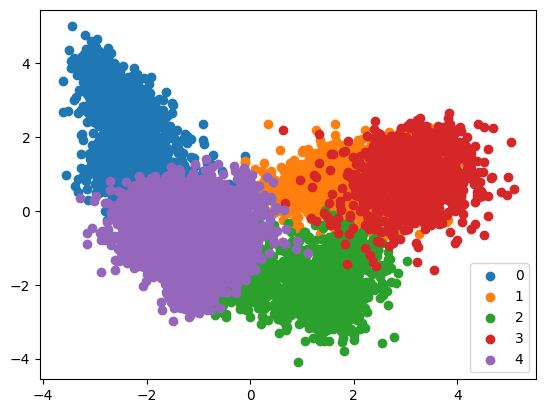

In [ ]:
kmeans = KMeans(n_clusters= 5)

#predict the labels of clusters.
label = kmeans.fit_predict(intermediate_output4)
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(principalDf4[label==i]['principal component 1'],principalDf4[label==i]['principal component 2'], label = i)
plt.legend()
plt.show()

## t-SNE

In [ ]:


import seaborn as sns
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(intermediate_output4)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.001s...
[t-SNE] Computed neighbors for 10001 samples in 0.857s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.427899
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.804184
[t-SNE] KL

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

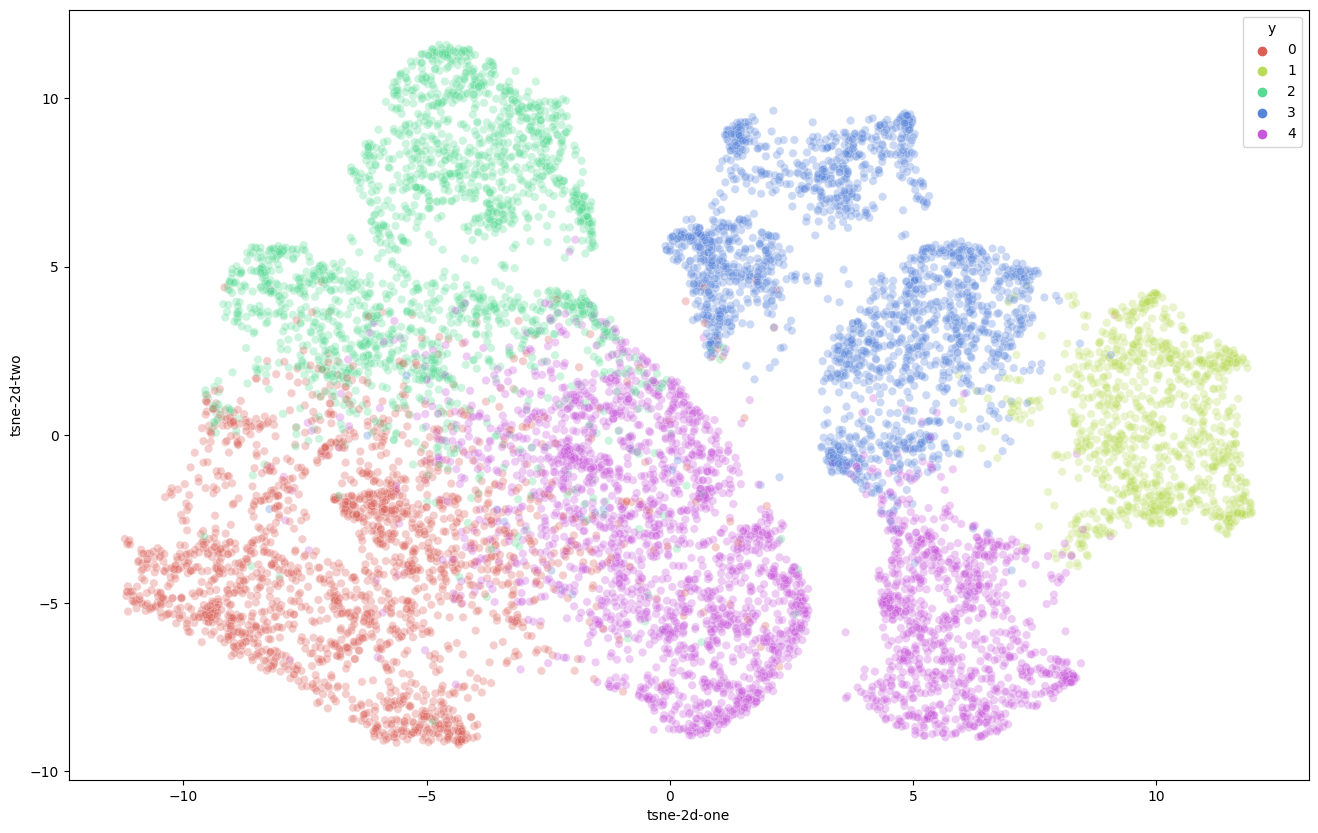

In [ ]:
df_subset=pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = test_labels
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 5),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [ ]:
print("Total training and validation time of Model 2: ",end2-start2)

Total training and validation time of Model 2:  263.3268449306488


In [ ]:
print("Total training and validation time of Model 3: ",end3-start3)

Total training and validation time of Model 3:  263.1572377681732


In [ ]:
print("Total training and validation time of Model 4: ",end4-start4)

Total training and validation time of Model 4:  204.10799765586853


In [ ]:
print("Total training and validation time of Model 5: ",end5-start5)

Total training and validation time of Model 5:  263.6791775226593


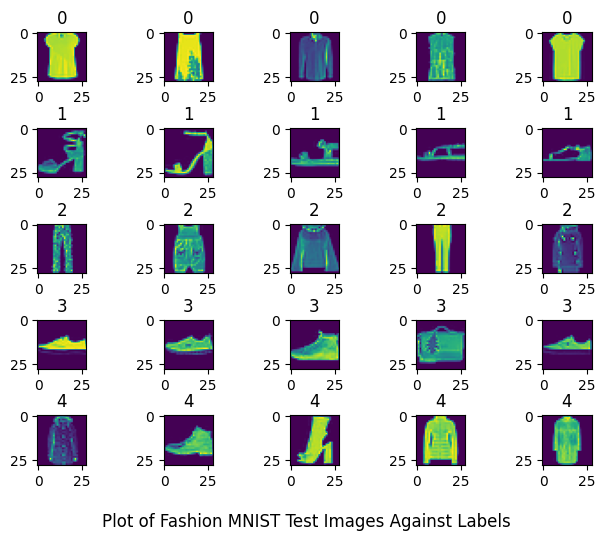

In [ ]:
import random
fig = plt.figure()
cellnum=1
p=test_images*255
for i in range(5):
  itlist = list(df_subset.loc[df_subset['y'] ==i].index)
  itlistitems = random.sample(itlist,5)
  for j in range(5):
    ax1 = fig.add_subplot(5,5,cellnum)
    ax1.title.set_text(df_subset['y'][itlistitems[j]])
    ax1.imshow(p[itlistitems[j]])
    cellnum+=1
plt.tight_layout(pad=0.05)
plt.suptitle("Plot of Fashion MNIST Test Images Against Labels",y=-0.05)
plt.show()